In [1]:
import pandas as pd

df1 = pd.read_csv('/Volumes/TRAVEL/Blender Humans/cfm_csv.csv')
df1.head(10)

,x,y,z
0,51.612854,11.944115,-264.511861
1,41.656353,3.311709,-256.325591
2,59.193441,19.599686,-269.118361
3,26.578357,-10.579193,-239.280980
4,25.020701,-17.205866,-231.942230
5,19.571914,-19.819391,-223.041470
6,35.674901,-6.488632,-248.468247
7,16.972750,-23.980226,-212.517591
8,14.784878,-26.064651,-201.422564
9,12.402426,-26.629832,-186.908999


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1,figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.grid(False)
plt.axis('off')
ax.scatter(df1.x, df1.y, df1.z, c='b', marker='.', alpha=.5)

for axaz in range(36):
    ax.view_init(azim=axaz*10,elev=15)
    temp = str(axaz)
    if(len(str(axaz))>1):
        temp = '0'+temp
    else:
        temp = '00'+temp
    plt.savefig('test_human_'+temp+'.jpg', format='jpg')


ValueError: shape mismatch: objects cannot be broadcast to a single shape

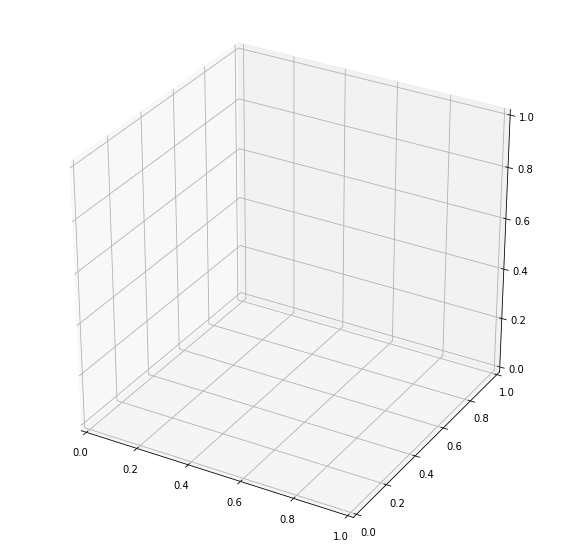

In [19]:
import numpy as np

X, Y = np.meshgrid(df1.x, df1.y)

z = 
for index, row in df1.iterrows():
    coord = (row.x, row.y)
    pos = [coord,row.z]
    z.append(pos)
Z = np.asarray(z)
    
fig2 = plt.figure(1,figsize=(10,10))
ax2 = fig2.add_subplot(111, projection='3d')

ax2.plot_wireframe(X, Y, Z, rstride=1, cstride=1)

plt.savefig('test_human-mesh')
plt.show()

In [36]:
Z = np.ndarray( (len(X),len(Y)) )

Z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
import numpy as np

X, Y = np.meshgrid(df1.x, df1.y)
Xp, Z = np.meshgrid(df1.x, df1.z)

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig3 = plt.figure(1,figsize=(5,5))
ax3 = fig3.add_subplot(111, projection='3d')

ax3.plot_wireframe(X, Y, Z, rstride=1, cstride=1)

plt.savefig('test_human-mesh')
plt.show()

<Figure size 1000x1000 with 1 Axes>

In [12]:
X[0]

array([ 51.61285373,  41.65635327,  59.19344105, ..., 100.11990843,
       113.75289379, 149.39306121])

In [13]:
Y[0]

array([11.94411544, 11.94411544, 11.94411544, ..., 11.94411544,
       11.94411544, 11.94411544])

In [14]:
Z[0]

array([-264.51186053, -264.51186053, -264.51186053, ..., -264.51186053,
       -264.51186053, -264.51186053])

ValueError: Argument Z must be 2-dimensional.

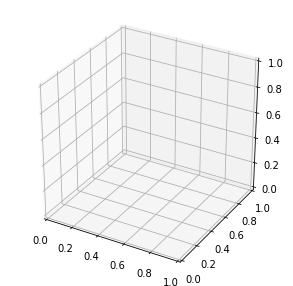

In [22]:
fig4 = plt.figure(1,figsize=(5,5))
ax4 = fig4.add_subplot(111, projection='3d')

ax4.plot_surface(df1.x,df1.y,df1.z)

plt.savefig('test_human-mesh2')
plt.show()

In [3]:
import os, fnmatch

mesh_path = './caesar-fitted-meshes/'
listOfFiles = os.listdir(mesh_path) 
pattern = "CSR*.mat" 
mesh_files = []

for entry in listOfFiles:  
    if fnmatch.fnmatch(entry, pattern):
            mesh_files.append(mesh_path+entry)
            
mesh_files[0]

'./caesar-fitted-meshes/CSR2035A.mat'

In [4]:
import scipy.io

meshes = []

for file in mesh_files:
    meshes.append(scipy.io.loadmat(file))
    
len(meshes)

2381

In [5]:
import itertools

mesh_subset = []
filename_subset = []
for m_sub in itertools.islice(meshes , 0, 100):
     mesh_subset.append(m_sub)
        
mesh_subset[0]

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Apr 10 14:44:57 2015',
 '__version__': '1.0',
 '__globals__': [],
 'points': array([[  41.03259317,   15.60633787, -217.88854056],
        [  30.14742741,    6.91504415, -209.80270765],
        [  48.58971442,   23.64275444, -222.53930971],
        ...,
        [  87.77095145, -142.66466808, -992.53659039],
        [ 104.2067453 , -123.03034644, -997.26743823],
        [ 140.52781577, -110.99736989, -997.35960975]])}

In [6]:
mesh_points = []

for sub in mesh_subset:
    mesh_points.append(sub['points'])

mesh_frames = []
    
for points in mesh_points:
    x,y,z = [], [], []
    for p in points:
        x.append(p[0])
        y.append(p[1])
        z.append(p[2])
    
    datap = {'x':x, 'y':y, 'z':z}
    dfp = pd.DataFrame(data=datap)
    mesh_frames.append(dfp)
    
mesh_frames[0].head(5)

,x,y,z
0,41.032593,15.606338,-217.888541
1,30.147427,6.915044,-209.802708
2,48.589714,23.642754,-222.539310
3,14.146272,-8.614106,-193.746231
4,11.520067,-15.492777,-186.495936


(0.0, 1.0, 0.0, 1.0)

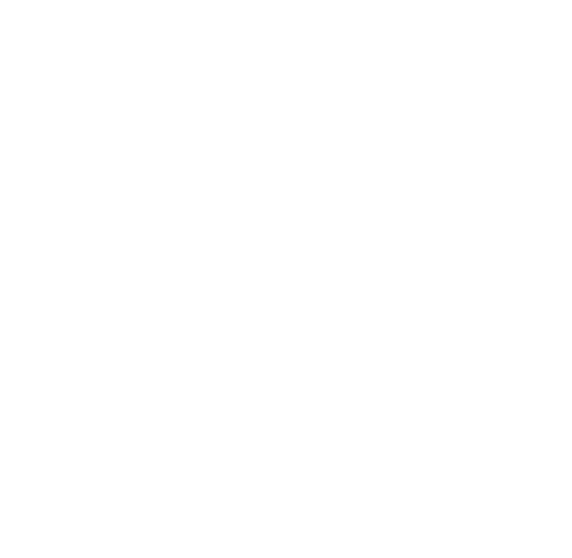

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig5 = plt.figure(1,figsize=(10,10))
ax5 = fig5.add_subplot(111, projection='3d')
ax5.view_init(azim=270,elev=15)
ax5.grid(False)
plt.axis('off')

img_path = './img/'
img_prefix = 'test_human-_'
jpg_suffix = '.jpg'

for mf in mesh_frames:
    ax5.scatter(mf.x,mf.y,mf.z, marker='.', alpha=.5)
    for axaz in range(36):
        ax.view_init(azim=axaz*10,elev=15)
        img_name = str(axaz)
        if(len(str(axaz))>1):
            img_name = '0'+img_name
        else:
            img_name = '00'+img_name
        plt.savefig(img_path+ img_prefix+ img_name+ jpg_suffix, format='jpg')

In [ ]:
for axaz in range(36):
    ax.view_init(azim=axaz*10,elev=15)
    temp = str(axaz)
    if(len(str(axaz))>1):
        temp = '0'+temp
    else:
        temp = '00'+temp
    plt.savefig('test_human-_'+temp+'.jpg', format='jpg')